## Say hello to `torch_dreams`

**What is it ?**
Torch-dreams is a python library that can be used as a tool to understand how neural networks build up their understanding of images. This is done through feature visualization. 

[Check it out on Github](https://github.com/Mayukhdeb/torch-dreams)

<img src = "https://github.com/Mayukhdeb/torch-dreams/raw/master/images/inceptionv3_cherrypicked_channels.jpg?raw=true">

If you want to know more about feature visualization, have a look at the following links:
* [Feature visualization by Olah, et al.](https://distill.pub/2017/feature-visualization/)
* [The enemy of feature visualization by Olah, et al.](https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis)

## Objective: optimize random noise to activate different classes and interpolate between them

In [ ]:
!pip install torch-dreams --upgrade

In [ ]:
!wget https://raw.githubusercontent.com/Mayukhdeb/torch-dreams/master/images/noise.jpg


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models 
from torch_dreams.dreamer import dreamer

In [ ]:
model = models.resnet18(pretrained=True)
dreamy_boi = dreamer(model)
layers_to_use = [model.fc]  

## Interpolating between classes

In [7]:
categories = {
    "goldfish": 1,
    "zebra": 340,
    "baloon": 417,
    "flamingo": 130
}

In [8]:
cherry_picked_indices = list(categories.values())
cherry_picked_indices

[1, 340, 417, 130]

If you want a finer interpolation, increase the value of the `num_steps` variable.

In [ ]:
num_steps = 10
alphas = np.linspace(0, 1, num_steps)

all_channel_activations = []

for i in range(len(cherry_picked_indices)-1):

    for alpha in alphas:
        print("alpha : ", alpha)
        def my_custom_func(layer_outputs):
            loss = layer_outputs[0][cherry_picked_indices[i]]*(1-alpha) +layer_outputs[0][cherry_picked_indices[i+1]]*(alpha)
            return loss

        out = dreamy_boi.deep_dream(
            image_path = "noise.jpg",
            layers = layers_to_use,
            octave_scale = 1.3,
            num_octaves = 10,
            iterations = 200,
            lr = 0.9,
            custom_func =  my_custom_func
        )
        all_channel_activations.append(out)

In [10]:
len(all_channel_activations)

30

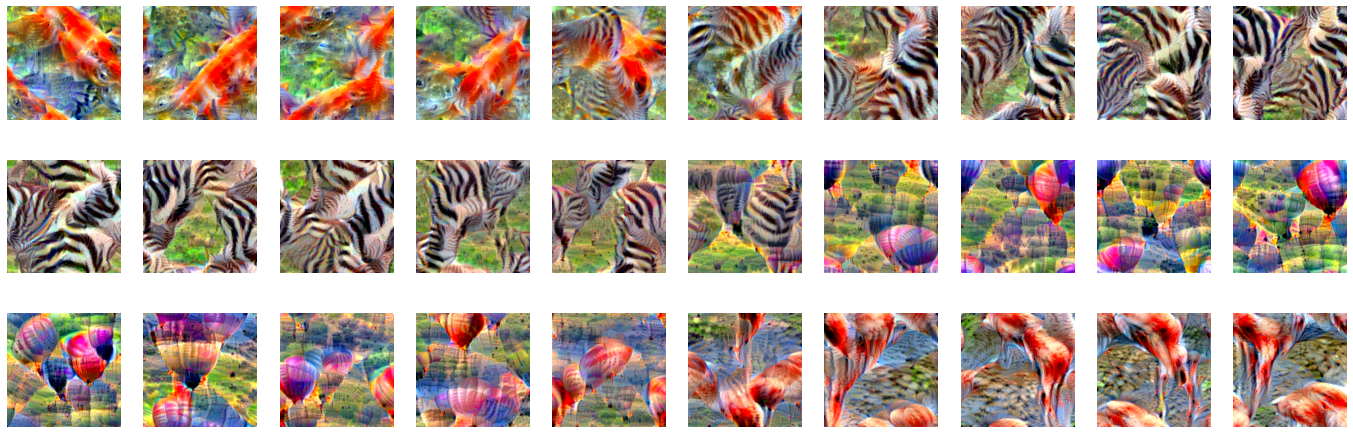

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=10, figsize = (24,8))

for i in range(len(all_channel_activations)):
    # title = "alpha: " + str(round(1 - alphas[i%len(alphas)], 2)) + "  beta: " + str(round(alphas[i%len(alphas)],2))
    ax.flat[i].imshow(all_channel_activations[i])
    # ax.flat[i].set_title(title, fontsize = 5)
    ax.flat[i].axis("off")
fig.savefig("resnet18_goldfish_zebra_baloon_interp.jpg")

In [ ]:
# !rm -rf resnet_interp_goldfish_zebra_baloon
!mkdir resnet_interp_goldfish_zebra_baloon

In [ ]:
import cv2
foldername = "resnet_interp_goldfish_zebra_baloon"
names = [
         foldername + "/" + str(i) + ".jpg" for i in range(30)
]

In [ ]:
for i in range(len(names)):
    cv2.imwrite(names[i], cv2.cvtColor(all_channel_activations[i], cv2.COLOR_BGR2RGB)*255)

In [ ]:
!zip -r interp_resnet.zip resnet_interp_goldfish_zebra_baloon